In [ ]:
import import_ipynb
import data_analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds = data_analysis.dataset

In [3]:
VZ_df = pd.DataFrame(data=ds['VZ'])

In [4]:
VZ_df.head()

,VZ
timestamp,
2019-01-02,56.02
2019-01-03,56.22
2019-01-04,56.36
2019-01-07,56.72
2019-01-08,58.38


In [5]:
#  Smoothening timeseries using rolling mean
VZ_df['rolling_mean'] = ds['VZ'].rolling(30).mean()

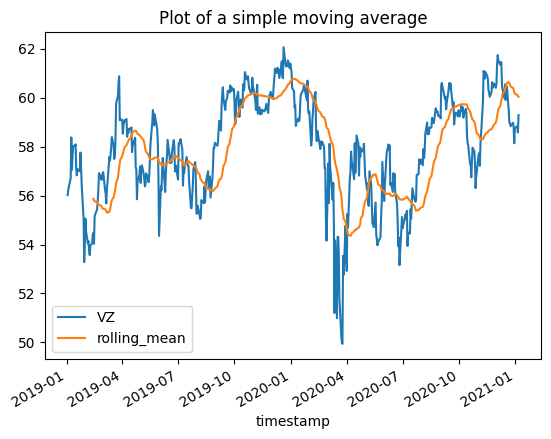

In [6]:
VZ_df.plot()
plt.title("Plot of a simple moving average");

### Moving Average (MA) model

In [7]:
ARMA_model = ARIMA(VZ_df['VZ'], order=(0, 0, 10))
results = ARMA_model.fit()
print(results.summary());
print(results.params[1])

                               SARIMAX Results                                
Dep. Variable:                     VZ   No. Observations:                  508
Model:                ARIMA(0, 0, 10)   Log Likelihood                -548.745
Date:                Sun, 12 Mar 2023   AIC                           1121.490
Time:                        12:56:11   BIC                           1172.255
Sample:                             0   HQIC                          1141.397
                                - 508                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.9071      0.256    226.059      0.000      57.405      58.409
ma.L1          0.8856      0.032     27.642      0.000       0.823       0.948
ma.L2          0.9550      0.044     21.657      0.0

### Predictions using MA model

In [8]:
start_date = VZ_df['VZ'].index[330]
end_date = VZ_df['VZ'].index[-1]

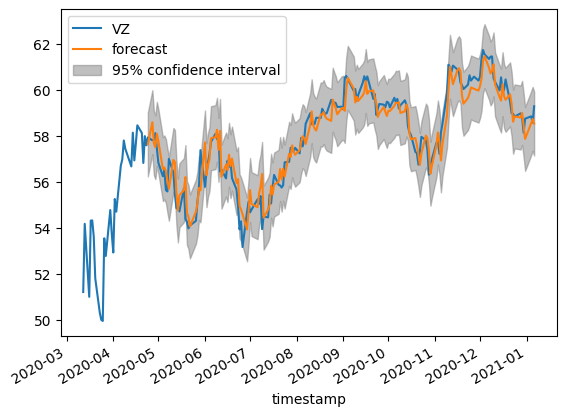

In [9]:
fig, ax = plt.subplots();
VZ_df['VZ'].loc[VZ_df['VZ'].index[300]:].plot(ax=ax)
plot_predict(results, start=start_date, end=end_date, ax=ax)
plt.show()